In [1]:
import pandas as pd
import numpy as np
from pathlib import Path

### 0. Mini Exercise

Download the "CSV" file from Ken French's library and create a dataframe that looks something like the one below: 

U.S. Research Returns Data (Downloadable Files)

Changes in CRSP Data

Fama/French 3 Factors  TXT  **CSV**  Details  Historical Archives

https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/data_library.html

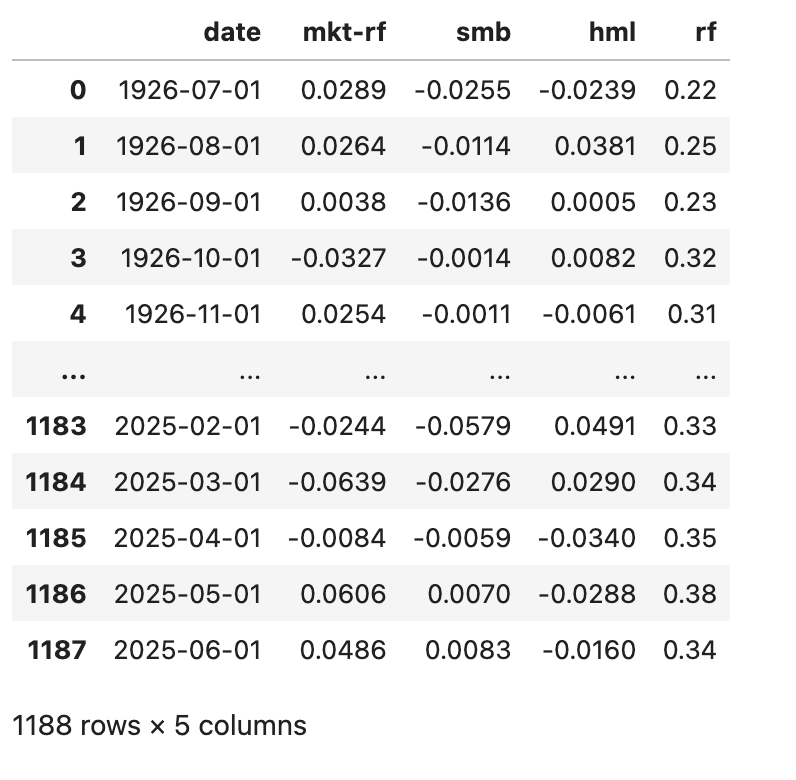

In [35]:
df = pd.read_csv('F-F_Research_Data_Factors.csv',skiprows=3,nrows=1188)

In [36]:
df=df.rename(columns={"Unnamed: 0":"Date"})

In [37]:
df["Date"] = pd.to_datetime(df['Date'],format="%Y%m")

In [38]:
df["Mkt-RF"]=df["Mkt-RF"]/100
df["SMB"]=df["SMB"]/100
df["HML"]=df["HML"]/100


In [39]:
df

,Date,Mkt-RF,SMB,HML,RF
0,1926-07-01,0.0289,-0.0255,-0.0239,0.22
1,1926-08-01,0.0264,-0.0114,0.0381,0.25
2,1926-09-01,0.0038,-0.0136,0.0005,0.23
3,1926-10-01,-0.0327,-0.0014,0.0082,0.32
4,1926-11-01,0.0254,-0.0011,-0.0061,0.31
...,...,...,...,...,...
1183,2025-02-01,-0.0244,-0.0579,0.0491,0.33
1184,2025-03-01,-0.0639,-0.0276,0.0290,0.34
1185,2025-04-01,-0.0084,-0.0059,-0.0340,0.35
1186,2025-05-01,0.0606,0.0070,-0.0288,0.38


### 1. Given exchange_codes and exchange_group, create a function that outputs a dictionary with exchange group as keys and the list of exchange codes as values.

In [40]:
#Input:
exchange_codes = [
                    10001,10017, 10018, 10019, 10024, 10029, 10032, 10033,
                    10034, 10035, 10036, 10037, 10038,
                    10039, 10040, 10041, 10042,
                    10020, 10046, 10055, 10116,10199, 10227, 10244, 
                    10127, 10216, 10223,10226, 10275, 10280,
                    10058, 10086, 10057,10056, 10065,10084, 10085
]
                
exchange_group = [ 
                    'NYSE','VSE','EURONEXT','SWISS','XETRA','SCANDI','MADRID','SCANDI',
                    'EURONEXT','LONDON','EURONEXT','EURONEXT','EURONEXT',
                    'SCANDI','EURONEXT','SCANDI','SWISS',
                    'EM_EU','EM_EU','EM_EU','EM_EU','EM_EU','EM_EU','EM_EU',
                    'ME','ME','ME','ME','ME','ME',
                    'ASX','ASX','ASX','ASX','ASX','ASX','ASX'
                 ]

In [118]:
check ={}
for k,v in zip(exchange_group,exchange_codes):
    if k not in check:
        check[k]=[]
    check[k].append(v)

In [119]:
check

{'NYSE': [10001],
 'VSE': [10017],
 'EURONEXT': [10018, 10034, 10036, 10037, 10038, 10040],
 'SWISS': [10019, 10042],
 'XETRA': [10024],
 'SCANDI': [10029, 10033, 10039, 10041],
 'MADRID': [10032],
 'LONDON': [10035],
 'EM_EU': [10020, 10046, 10055, 10116, 10199, 10227, 10244],
 'ME': [10127, 10216, 10223, 10226, 10275, 10280],
 'ASX': [10058, 10086, 10057, 10056, 10065, 10084, 10085]}

In [ ]:
#Expected Output:
{
    'NYSE'    : [10001],
    'VSE'     : [10017],
    'EURONEXT': [10018, 10034, 10036, 10037, 10038, 10040],
    'SWISS'   : [10019, 10042],
    'XETRA'   : [10024],
    'SCANDI'  : [10029, 10033, 10039, 10041],
    'MADRID'  : [10032],
    'LONDON'  : [10035],
    'EM_EU'   : [10020, 10046, 10055, 10116, 10199, 10227, 10244],
    'ME'      : [10127, 10216, 10223, 10226, 10275, 10280],
    'ASX'     : [10058, 10086, 10057, 10056, 10065, 10084, 10085]
 }

### 2. Create a read_file function that can read csv, parquet, and feather files. Add an error / exception handler to return the message "file does not exist" if the file path passed on to the function does not exist. 

In [14]:
def read_file(path):
    path = Path(path)
    try:
        ext = path.suffix.lower()
        if ext==".csv":
            pd.read_csv(path)
        elif ext==".parquet":
            pd.read_parquet(path)
        elif ext==".feather":
            pd.read_feather(path)
        else:
            raise ValueError("Unsupported File Type")
    except:
        print("File does not exist")

    
        

### 3. Given a dataframe with columns "days" referring to maturities and "rates" as zero rates, and a specific maturity, create a function that returns the linearly interpolated 

In [95]:
#Input:
df_zero = pd.read_csv('20150105.zero_rate.csv')
maturity = 30
output = 0.149258 + ( (0.217175 - 0.149258) / (44 - 16) )*(30 - 16)
output/100

0.001832165

In [87]:
df_zero

,days,rate
0,7,0.136752
1,16,0.149258
2,44,0.217175
3,72,0.237194
4,100,0.251680
5,135,0.270532
6,163,0.291974
7,254,0.350735
8,345,0.434581
9,436,0.536226


In [115]:
def linearinterpolate(maturity,df):
    days=df["days"].values
    rates=df["rate"].values
    if maturity <= days[0]:
        t1,t2 = days[0],days[1]
        r1,r2 = rates[0],rates[1]
    elif maturity >= days[-1]:
        t1,t2 = days[-2],days[-1]
        r1,r2 = rates[-2],rates[-1]
    else:
        for i in range(0,len(df)):
            if maturity <= df["days"][i]:
                t1,t2 = days[i-1],days[i]
                r1,r2 = rates[i-1],rates[i]
                break
    output= r1 +((r2-r1)/(t2-t1))*(maturity-t1)
    return output/100


In [117]:
linearinterpolate(30,df_zero)

0.001832165